# PFAM CLUSTERING

In [1]:
# Open dct and clans dict from pickle
import pickle

# DCT df is used for clustering
with open('../pfam_data/dct_df.pkl', 'rb') as f:
    dct_df = pickle.load(f)

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Get linkage data from desired clustering method and save to pickle
linkage_data = linkage(dct_df, method='single', metric='cityblock')
with open('../pfam_data/linkage_data.pkl', 'wb') as f:
    pickle.dump(linkage_data, f)

In [ ]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linkage_data, criterion='distance', t=500)

{'icoord': [[375.0, 375.0, 385.0, 385.0],
  [875.0, 875.0, 885.0, 885.0],
  [3475.0, 3475.0, 3485.0, 3485.0],
  [3505.0, 3505.0, 3515.0, 3515.0],
  [3525.0, 3525.0, 3535.0, 3535.0],
  [3805.0, 3805.0, 3815.0, 3815.0],
  [3875.0, 3875.0, 3885.0, 3885.0],
  [5435.0, 5435.0, 5445.0, 5445.0],
  [5455.0, 5455.0, 5465.0, 5465.0],
  [5440.0, 5440.0, 5460.0, 5460.0],
  [5425.0, 5425.0, 5450.0, 5450.0],
  [6125.0, 6125.0, 6135.0, 6135.0],
  [6845.0, 6845.0, 6855.0, 6855.0],
  [6995.0, 6995.0, 7005.0, 7005.0],
  [7205.0, 7205.0, 7215.0, 7215.0],
  [7385.0, 7385.0, 7395.0, 7395.0],
  [7705.0, 7705.0, 7715.0, 7715.0],
  [7885.0, 7885.0, 7895.0, 7895.0],
  [8145.0, 8145.0, 8155.0, 8155.0],
  [8275.0, 8275.0, 8285.0, 8285.0],
  [8265.0, 8265.0, 8280.0, 8280.0],
  [8725.0, 8725.0, 8735.0, 8735.0],
  [8715.0, 8715.0, 8730.0, 8730.0],
  [8755.0, 8755.0, 8765.0, 8765.0],
  [8795.0, 8795.0, 8805.0, 8805.0],
  [9095.0, 9095.0, 9105.0, 9105.0],
  [9595.0, 9595.0, 9605.0, 9605.0],
  [9805.0, 9805.0, 9815.0,

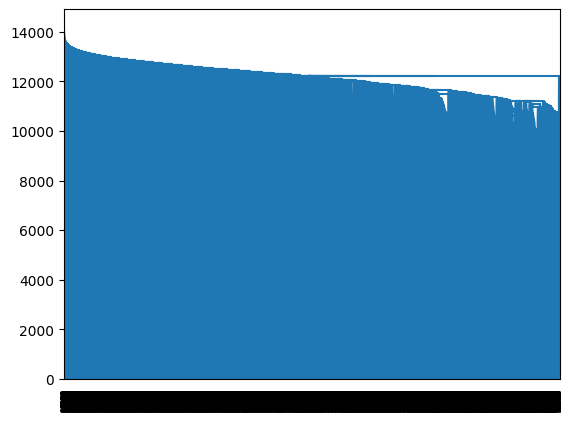

In [4]:
import sys
sys.setrecursionlimit(10000000)

# Graph linkage data as dendrogram
dendrogram(linkage_data)

# SCOP CLUSTERING

In [1]:
# Open dct and scop dict from pickle
import pickle

with open('../scop_data/superfams_df.pkl', 'rb') as f:
    fams_df = pickle.load(f)

In [4]:
fams_df.head()

,8045703,8094330,8017835,8021315,8021787,8021931,8022184,8022194,8022532,8023273,...,8022861,8022862,8022863,8022866,8022868,8022870,8027500,8027593,8028119,8028297
8045703,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8094330,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8017835,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8021315,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8021787,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Load data from .npz file
import numpy as np
data_all0 = np.load('../scop_data/scop_fa_represeq_lib_latest.npz')
data_all = data_all0['arr_0']  # np.array of np.arrays with 3 elements: domain, range, and DCT vector
#tot = len(data_all)  # 19621 domains

In [14]:
data_all

array([['8072807', '1-134',
        '49,87,127,46,24,26,24,53,67,40,41,68,38,63,60,68,101,49,46,63,80,79,32,61,51,89,84,46,58,55,63,31,54,96,72,47,40,46,32,21,30,43,69,31,70,59,96,53,61,35,42,60,74,53,0,110,39,71,84,39,58,52,36,96,52,45,30,60,63,107,78,60,74,49,49,49,1,57,56,3,32,47,46,42,14,94,62,49,76,32,88,29,127,59,95,87,51,94,65,73,106,51,40,20,74,73,40,70,41,77,64,40,88,84,81,46,68,55,0,28,37,32,73,70,95,69,70,46,87,47,90,33,64,73,66,78,27,65,71,72,70,34,57,56,114,50,49,109,24,43,93,35,77,93,40,100,66,100,52,123,53,120,69,72,35,56,103,48,64,70,44,19,25,55,123,67,119,10,75,65,46,85,38,54,45,25,48,92,127,27,48,98,96,84,54,63,66,42,43,40,71,68,87,61,89,108,116,63,68,82,73,69,55,66,73,39,34,58,74,73,70,51,29,49,105,20,86,36,67,55,66,63,28,58,68,65,89,38,23,37,10,41,0,83,28,60,45,66,71,126,89,35,77,72,85,54,41,21,30,58,45,36,55,113,63,68,83,95,95,47,83,79,127,75,47,7,81,72,68,61,64,83,84,75,103,74,59,87,70,55,49,48,95,95,19,0,55,60,81,15,68,89,69,83,31,77,73,81,83,81,60,93,60,116,0,52

In [12]:
# Look for 8002853 in data_all
for i in range(len(data_all)):
    if data_all[i][0] == '8002853':
        print(data_all[i])

['8002853' '1-232'
 '63,62,36,39,92,75,49,65,95,0,49,68,55,57,97,50,30,56,81,82,36,99,90,77,77,70,45,71,117,85,101,54,92,79,86,97,86,78,57,84,127,113,82,87,49,46,81,33,64,60,62,64,92,76,73,99,72,81,52,34,81,53,72,49,47,86,69,48,70,56,41,87,66,84,7,47,123,86,71,31,95,46,75,7,84,67,50,80,57,47,44,98,92,10,61,80,15,70,54,43,50,29,88,56,12,104,23,58,37,61,41,127,49,48,55,73,55,67,0,57,36,75,35,89,73,97,88,82,39,49,39,33,74,66,62,98,59,30,59,54,67,13,49,66,49,29,57,89,63,77,80,87,87,35,64,79,42,19,58,46,69,31,97,33,56,43,36,44,50,77,72,78,50,63,38,75,18,36,78,102,64,100,61,84,51,87,93,43,53,91,85,48,18,48,63,75,32,73,26,21,24,83,19,96,19,38,31,75,27,21,1,0,40,48,34,78,56,35,45,63,20,77,61,41,44,28,91,36,51,107,52,64,34,72,47,11,29,55,76,72,50,36,85,48,92,84,21,3,74,100,82,80,74,127,21,74,65,94,114,48,97,86,76,82,98,89,79,52,42,78,43,41,99,82,86,74,78,58,80,111,44,127,124,0,92,31,29,34,45,88,73,43,60,92,38,47,94,30,95,42,38,44,64,70,51,32,36,39,48,33,12,55,36,89,86,71,21,54,2,53,47,96,13,23,

In [1]:
import pickle
with open('../scop_data/fams_df.pkl', 'rb') as f:
    fams_df = pickle.load(f)

In [2]:
fams_df.head()

,8000061,8000376,8000693,8000768,8000794,8000805,8000813,8000821,8000866,8000871,...,8107813,8107815,8107817,8107819,8107821,8107823,8107825,8107827,8107829,8107831
8000061,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8000376,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8000693,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8000768,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8000794,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
